In [136]:
import numpy as np
import pandas as pd
import sklearn as skl
from scipy.spatial import distance
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

# KNN Classifier from Scratch

In [7]:
data=load_iris()
x=data.data
y=data.target

In [18]:
x[:,0].shape

(150,)

In [12]:
y[0].shape

()

In [35]:
df=pd.DataFrame({'sepal_len':x[:,0],'sepal_wid':x[:,1],'petal_len':x[:,2],'petal_wid':x[:,3],'type':y})

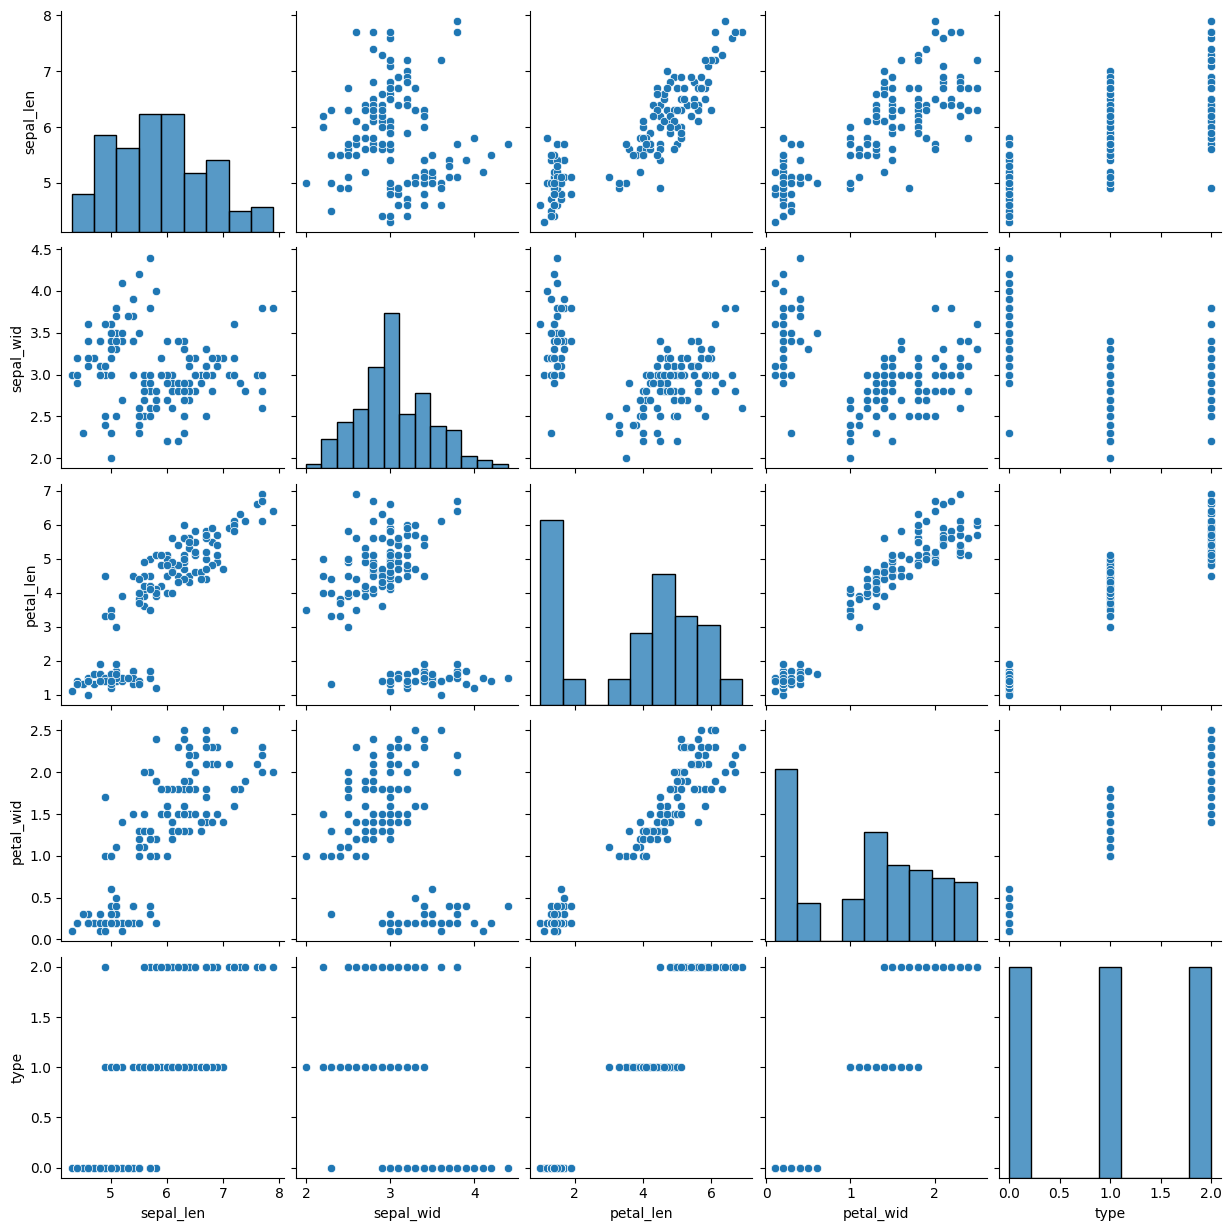

In [36]:
sns.pairplot(df)

array([[<AxesSubplot: title={'center': 'sepal_len'}>,
        <AxesSubplot: title={'center': 'sepal_wid'}>],
       [<AxesSubplot: title={'center': 'petal_len'}>,
        <AxesSubplot: title={'center': 'petal_wid'}>],
       [<AxesSubplot: title={'center': 'type'}>, <AxesSubplot: >]],
      dtype=object)

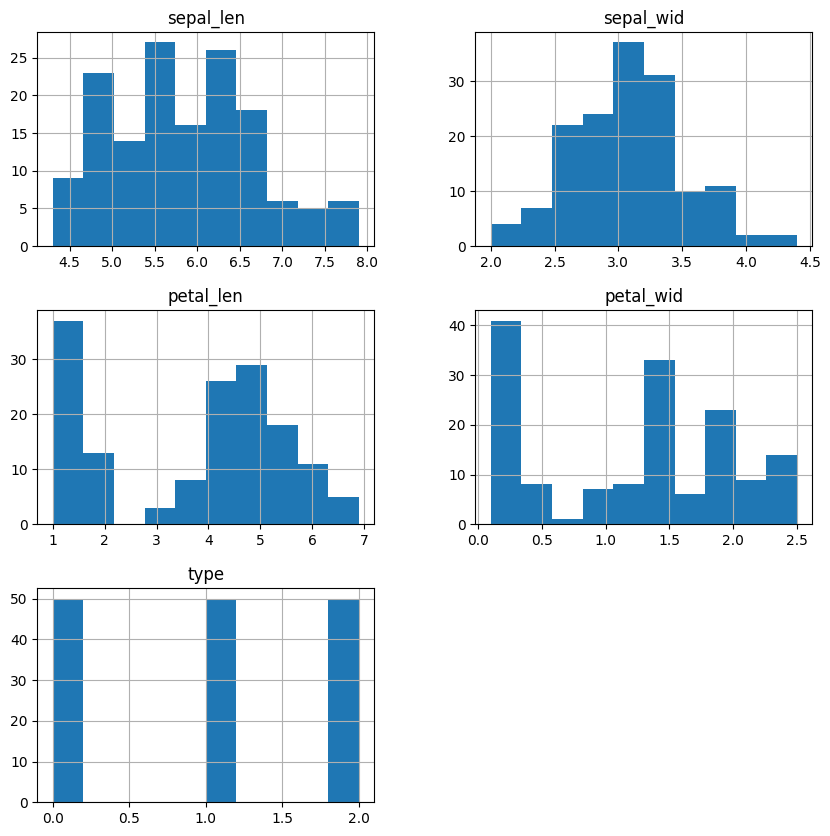

In [37]:
df.hist(figsize=(10,10))

Text(0.5, 1.0, 'Correlation Matrix of the Dataset')

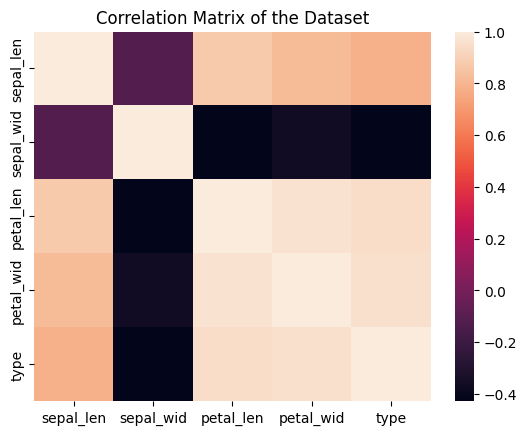

In [38]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix of the Dataset')

Text(0.5, 1.0, 'Correlation with target Graph')

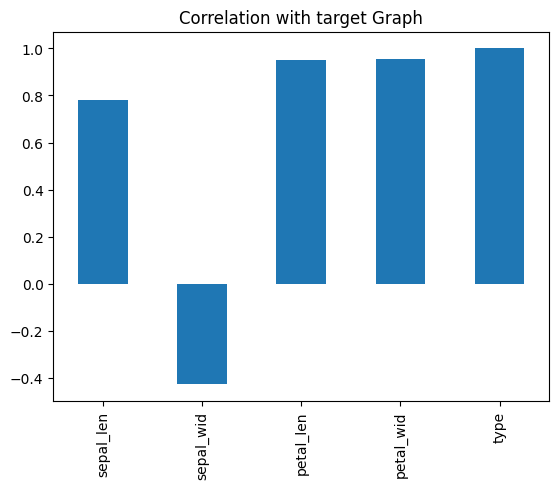

In [40]:
df.corr()['type'].plot(kind='bar')
plt.title('Correlation with target Graph')

<AxesSubplot: title={'center': 'Dataset Distribution'}>

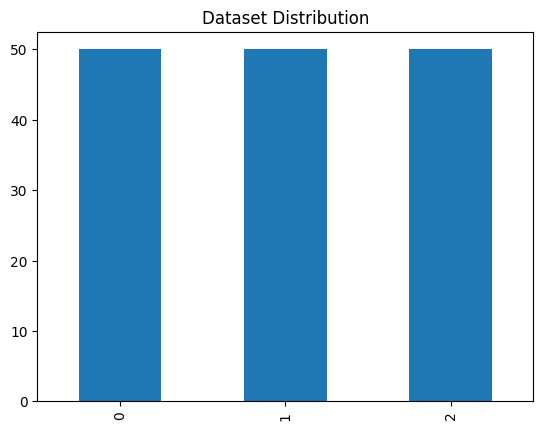

In [42]:
plt.title("Dataset Distribution")
df.type.value_counts().plot(kind='bar')

In [186]:

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        target=['Setosa','Versicolor','Virginica']
        y_pred = []
        
        for sample in X_test:
            distances = []
            
            # Calculate distances between the test sample and each training sample
            for train_sample, train_label in zip(self.X_train, self.y_train):
                dist = distance.euclidean(sample, train_sample)#many other distances can be used like manhattan, minowkski, cosine
                distances.append((dist, train_label))
                #print(f'train sample:{train_sample}')
                #print(f'train label: {train_label}')
                #print(f'distance: {dist}')
                print(f'{train_sample}\t{target[train_label]:20s}{dist}\n')
                # Sort distances in ascending order
            distances.sort(key=lambda x: x[0])
            # Select the labels of the k nearest neighbors
            k_nearest_labels = [label for _, label in distances[:self.k]]
            print(f'{k}-nearest Labels: {[target[i] for i in k_nearest_labels]}')
            # Predict the label based on majority voting
            label_counts = np.bincount(k_nearest_labels)
            #print(label_counts)
            predicted_label = np.argmax(label_counts)
            
            y_pred.append(predicted_label)
        
        return y_pred


In [64]:
len(x[:int(len(x)*0.2)])

30

# Time Analysis

In [122]:
t=[]
k=[]
p=[]

In [123]:
percent=1
for i in range(3,11):
    knn=KNNClassifier(k=i)
    print(i)
    knn.fit(x[:int(len(x)*percent)],y[:int(len(y)*percent)])
    start=time.time()
    knn.predict(x[:int(len(x)*0.3)])
    end=time.time()
    t.append(end-start)
    k.append(i)
    p.append(percent)

3
4
5
6
7
8
9
10


In [124]:
time_df=pd.DataFrame({'time':t,'k':k,'percent':p})

Text(0.5, 1.0, 'Time Analysis for different K Values when testing=30%')

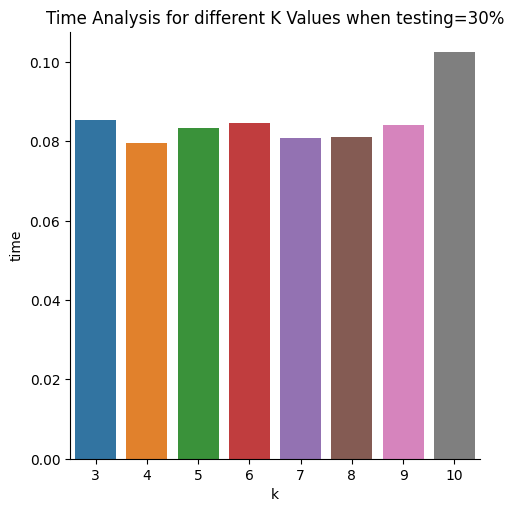

In [126]:
sns.catplot(time_df,kind='bar',x='k',y='time')
plt.title("Time Analysis for different K Values when testing=30%")

<BarContainer object of 8 artists>

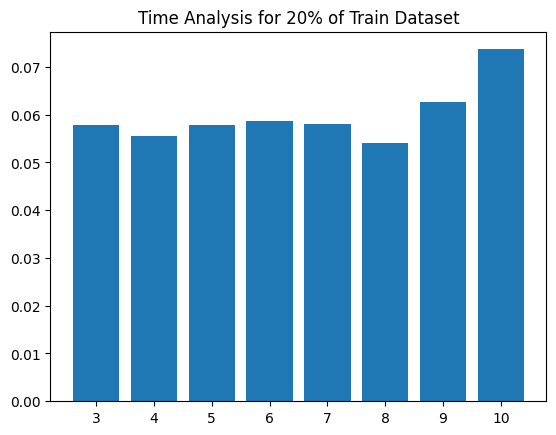

In [80]:
plt.title("Time Analysis for 20% of Train Dataset")
plt.bar(k,t)

In [129]:
print("Time Analysis with testing 30%")
time_df.drop('percent',axis=1)

Time Analysis with testing 30%


,time,k
0,0.085377,3
1,0.079497,4
2,0.083313,5
3,0.084569,6
4,0.080944,7
5,0.081228,8
6,0.084195,9
7,0.102476,10


In [111]:
print('Time Analysis Table')
time_df.pivot(columns='percent',index='k',values='time')


Time Analysis Table


percent,0.2,0.4,0.6,0.8,1.0
k,,,,,
3,0.055994,0.108884,0.159796,0.217348,0.255483
4,0.053367,0.102889,0.152994,0.209220,0.258995
5,0.054009,0.105746,0.154979,0.211527,0.257465
6,0.053853,0.103971,0.154917,0.213122,0.256356
7,0.053637,0.103876,0.156131,0.208283,0.259721
8,0.053389,0.104457,0.153660,0.205158,0.285012
9,0.059067,0.104387,0.153011,0.206591,0.266933
10,0.059064,0.128633,0.151492,0.211030,0.257949


# Performance Analysis

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [132]:
len(x_train),len(y_train)

(105, 105)

In [140]:
k=3
percent=[0.2,0.4,0.6,0.8,1.0]
for i in range(3,16,2):
    knn=KNNClassifier(k=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print(f'Testing Dataset 30% with K={i} ')
    print(metrics.classification_report(y_test,y_pred,target_names=['Setosa','Versicolor','Virginica']))

Testing Dataset 30% with K=3 
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.88      0.88      0.88        17
   Virginica       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

Testing Dataset 30% with K=5 
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.80      0.94      0.86        17
   Virginica       0.91      0.71      0.80        14

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Testing Dataset 30% with K=7 
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.77      1.00      

In [144]:
acc=[]
ks=[]
for i in range(3,150):
    knn=KNNClassifier(k=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))
    ks.append(i)
    

Text(0.5, 1.0, 'Accuracy vs K Graph')

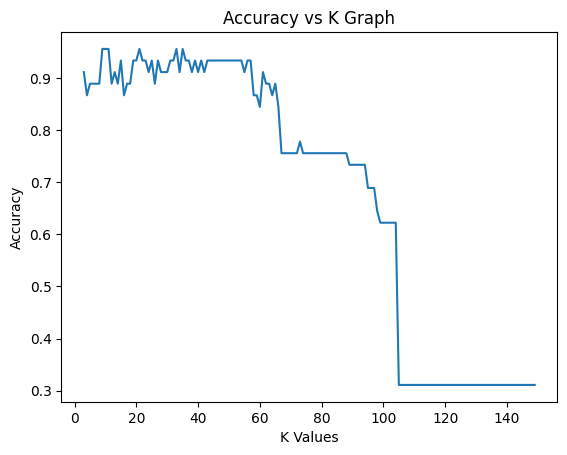

In [147]:
plt.plot(ks,acc)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Graph')

In [189]:
knn=KNNClassifier(k=3)
features=['sepal length','sepal width','petal length','petal width']
target=['Setosa','Versicolor','Virginica']
knn.fit(x_train[:20],y_train[:20])
print(f'test data:')
print(' '.join(features))
print('\t     '.join([str(i) for i in x_test[0]]))
print(f'train sample\t\tlabel\t\t\tdistance')
print('Predicted Class:',target[knn.predict([x_test[0]])[0]])

test data:
sepal length sepal width petal length petal width
6.4	     2.8	     5.6	     2.1
train sample		label			distance
[4.7 3.2 1.3 0.2]	Setosa              5.014977567247933

[6.7 3.1 5.6 2.4]	Virginica           0.5196152422706631

[6.2 2.9 4.3 1.3]	Versicolor          1.5427248620541512

[4.7 3.2 1.6 0.2]	Setosa              4.760252094164762

[4.9 2.4 3.3 1. ]	Versicolor          2.9849623113198596

[5.5 2.4 3.7 1. ]	Versicolor          2.406241883103193

[7.3 2.9 6.3 1.8]	Virginica           1.183215956619923

[4.8 3.4 1.9 0.2]	Setosa              4.496665431183423

[5.1 3.3 1.7 0.5]	Setosa              4.439594576084622

[6.1 2.9 4.7 1.4]	Versicolor          1.1832159566199232

[5.4 3.9 1.3 0.4]	Setosa              4.856953777832357

[7.9 3.8 6.4 2. ]	Virginica           1.9748417658131503

[5.2 3.5 1.5 0.2]	Setosa              4.727578661429125

[5.1 3.8 1.5 0.3]	Setosa              4.768647607026545

[6.9 3.2 5.7 2.3]	Virginica           0.678232998312527

[5.  3.2 1.2 0.2]